In [1]:
#@markdown Run this cell to install Biopython
!pip install Biopython==1.83

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
import Bio
print(Bio.__version__)

1.83


# Genomics Data Analysis

**Data:** Covid19 wuhan virus - DNA sequencing data

we applied the Biopython fundamentals to a real-world use case to understand how to perform sequence analysis.

## Sequence analysis of Covid-19

A sequence is a series of letters

**The type of Sequence** - String together in a protein

1. DNA -  A, G, C, and T
2. RNA -  A, G, C, and U
3. Amino acids -  D, T, S, E, P, G, A, C, V, M, I, L, Y, F, H, K, R, W, Q, and N


**Seq object**

The first and the most important object to deal with sequence data in Biopython is the `Seq object`. It essentially combines a Python string with biological methods such as DNA, RNA, or protein.

Each Seq object has two important attributes:
1. Data - The actual sequence string ('ATCTGTCCTACT').
2. Alphabet - determines type of sequence

Supports 2 types of Methods:
1. General Methods - (find, count, and so on)
2. Nucleotide Methods - (complement, reverse_complement, transcribe, back_transcribe, translate, and so on)


**SeqRecord**

This object differs from the Seq object in that it holds a sequence (as a Seq object) with additional information such as identifier, name, and description.

 **SeqIO Object** :

 supporting file formats as input and output

 1. FASTA
 2. FASTA-2line
 3. FASTQ
 4. GenBank or GB

FASTA format file

In [ ]:
from Bio import SeqIO

# Open the file and iteratively parse the sequence
# The parse() method takes two arguments
# fh_in – the file handle and
# fasta - the file format.

with open("example.fasta") as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
        print(record.id)

GenBank format file

In [ ]:
with open("example.gbk") as fh_in:
    for record in SeqIO.parse(fh_in, "genbank"):
        print(record.annotations)


Example Reord

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("AGTAGGACAGAT")
print(my_seq)

AGTAGGACAGAT


In [ ]:
print("Complement : "+ my_seq.complement())
print("Reverse Complement : "+ my_seq.reverse_complement())

Complement : TCATCCTGTCTA
Reverse Complement : ATCTGTCCTACT


**Goal:** is to analyze genomic data of Covid-19 with Biopython

## Data Extraction

The full sequence of the Wuhan virus can be downloaded (https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta); save it as covid19.fasta locally on your computer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Genomics/

Covid19.fasta


## Data Understanding

In [ ]:
from Bio import SeqIO

# Wuhan genome sequence
file_path = '/content/drive/MyDrive/Genomics/Covid19.fasta'

# Print name, description, number of features, sequence, and sequence length.
with open(file_path) as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
            print(f'sequence information: {record}')
            print(f'sequence length: {len(record)}')


sequence information: ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
sequence length: 29903


### Calculating GC content

GC content is one of the important features of a DNA sequence as it is an important predictor of gene function and species ecology.

 GC content is calculated by counting the number of Gs and Cs in the sequence and dividing that by the total sequence length.

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction

with open(file_path) as fh_in:
	for record in SeqIO.parse(fh_in, "fasta"):
		print(f"GC content of {record} : {gc_fraction(record):.2f}")



GC content of ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA') : 0.38


### Calculating nucleotide content

In [ ]:
with open(file_path) as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
            seq_record = record.seq
            seq_length = len(record.seq)
            print(f'% of Ts: {round(seq_record.count("T")/seq_length*100, 2)}')
            print(f'% of As: {round(seq_record.count("A")/seq_length*100, 2)}')
            print(f'% of Cs: {round(seq_record.count("C")/seq_length*100, 2)}')
            print(f'% of Gs: {round(seq_record.count("G")/seq_length*100, 2)}')

% of Ts: 32.08
% of As: 29.94
% of Cs: 18.37
% of Gs: 19.61


### Dinucleotide content

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt

nucl = ['A', 'T', 'C', 'G']
di_nucl_dict = {}

with open(file_path) as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
        for n1 in nucl:
            for n2 in nucl:
                di = str(n1) + str(n2)
                di_nucl_dict[di] = record.seq.count(di)


# Display dictionary consisting of all possible dinucleotides as keys and counts for those dinucleotides as values.
print(di_nucl_dict)

{'AA': 2169, 'AT': 2308, 'AC': 2023, 'AG': 1742, 'TA': 2377, 'TT': 2454, 'TC': 1413, 'TG': 2589, 'CA': 2084, 'CT': 2081, 'CC': 784, 'CG': 439, 'GA': 1612, 'GT': 1990, 'GC': 1168, 'GG': 973}


### EDA and visualization for dinucleotide plot

{'AA': 2169, 'AT': 2308, 'AC': 2023, 'AG': 1742, 'TA': 2377, 'TT': 2454, 'TC': 1413, 'TG': 2589, 'CA': 2084, 'CT': 2081, 'CC': 784, 'CG': 439, 'GA': 1612, 'GT': 1990, 'GC': 1168, 'GG': 973}


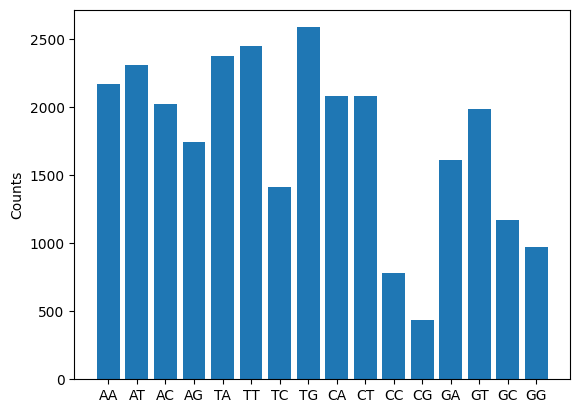

In [ ]:
import matplotlib.pyplot as plt

di = [k for k, v in di_nucl_dict.items()]
counts = [v for k, v in di_nucl_dict.items()]
print(di_nucl_dict)


plt.bar(di,counts)
plt.ylabel("Counts")
plt.show()

## Modeling

Two types
1. Statistical-based methods
2. ML-based methods

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd

nucl = ['A', 'T', 'C', 'G']
final_dict = {}

with open(file_path) as fh_in:
    with open("test.csv", 'w') as fh_out:
        for record in SeqIO.parse(fh_in, "fasta"):
            for n1 in nucl:
                for n2 in nucl:
                    di = str(n1) + str(n2)
                    final_dict[di] = record.seq.count(di)

            A_count = record.seq.count('A')
            final_dict['A_count'] = round(A_count/len(record) * 100, 2)
            C_count = record.seq.count('C')
            final_dict['C_count'] = round(C_count/len(record) * 100, 2)
            G_count = record.seq.count('G')
            final_dict['G_count'] = round(G_count/len(record) * 100, 2)


In [ ]:
!cat test.csv

In [ ]:
# After Extracting the features into dictionary for di_nucl_dict


print(di_nucl_dict)

# Save it as Dataframe

final_df = pd.DataFrame.from_dict([di_nucl_dict])
final_df['virus'] = "Covid19"
final_df.to_csv("covid19_features.csv", index=None)

{'AA': 2169, 'AT': 2308, 'AC': 2023, 'AG': 1742, 'TA': 2377, 'TT': 2454, 'TC': 1413, 'TG': 2589, 'CA': 2084, 'CT': 2081, 'CC': 784, 'CG': 439, 'GA': 1612, 'GT': 1990, 'GC': 1168, 'GG': 973}


In [ ]:
final_df

,AA,AT,AC,AG,TA,TT,TC,TG,CA,CT,CC,CG,GA,GT,GC,GG,virus
0,2169,2308,2023,1742,2377,2454,1413,2589,2084,2081,784,439,1612,1990,1168,973,Covid19


In [ ]:
!cat covid19_features.csv

AA,AT,AC,AG,TA,TT,TC,TG,CA,CT,CC,CG,GA,GT,GC,GG,virus
2169,2308,2023,1742,2377,2454,1413,2589,2084,2081,784,439,1612,1990,1168,973,Covid19


### Motif finder

A motif is a pattern in a nucleotide or amino acid sequence that has a specific structure.

The important attributes that are available for motif objects are
1. Position frequency matrix (PFM) also called as count
2.

In [ ]:
from Bio import motifs

# create a simple DNA motif object
my_motif = [Seq("ACGT"), Seq("TCGA"), Seq("CGGC")]

# creating a list of Seq objects
seq = motifs.create(my_motif)
print(seq)

# print count or PFM
print(seq.counts)

ACGT
TCGA
CGGC
        0      1      2      3
A:   1.00   0.00   0.00   1.00
C:   1.00   2.00   0.00   1.00
G:   0.00   1.00   3.00   0.00
T:   1.00   0.00   0.00   1.00


In [ ]:
seq.weblogo('my_motif.png')

In [ ]:
!ls my_motif.png

my_motif.png
